In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from tabulate import tabulate

### Step-1: Load the Dataset

In [49]:
df = pd.read_csv("listings.csv")

In [50]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,39572,https://www.airbnb.com/rooms/39572,20250103033441,2025-01-03,city scrape,1 br in a 2 br apt (Midtown West),NaN,NaN,https://a0.muscache.com/pictures/fd1bffd9-ccf8...,169927,...,5.00,4.98,4.86,NaN,f,2,1,1,0,0.25
1,39593,https://www.airbnb.com/rooms/39593,20250103033441,2025-01-03,city scrape,A lovely room w/ a Manhattan view,"A private, furnished large room to rent Jan/F...","Nate Silver called this super safe, clean, qui...",https://a0.muscache.com/pictures/0b9110f7-3b24...,110506,...,4.96,4.79,4.93,NaN,f,1,0,1,0,0.20
2,39704,https://www.airbnb.com/rooms/39704,20250103033441,2025-01-03,previous scrape,"Private, Large & Sunny 1BR w/W&D",It's a No Brainer:<br />•Terrific Space For Le...,The Neighborhood<br />• Rich History <br />• B...,https://a0.muscache.com/pictures/0bc4e8a4-c047...,170510,...,4.92,4.38,4.72,NaN,f,2,2,0,0,1.93
3,42300,https://www.airbnb.com/rooms/42300,20250103033441,2025-01-03,city scrape,Beautiful Lower East Side Loft,Architect-owned loft is a corner unit in a bea...,"The apartment is in the border of Soho, LES an...",https://a0.muscache.com/pictures/0e285e13-ee14...,184755,...,4.87,4.57,4.62,NaN,f,1,1,0,0,0.40
4,42729,https://www.airbnb.com/rooms/42729,20250103033441,2025-01-03,city scrape,@HouseOnHenrySt - Private 2nd bedroom w/shared...,NaN,"Lovely old Brooklyn neighborhood, with brick/b...",https://a0.muscache.com/pictures/925fe213-f5e1...,11481,...,4.73,4.58,4.64,NaN,f,4,1,3,0,1.26


### Step-2: Understand the Data

In [51]:
print("Dataset Shape:", df.shape)

Dataset Shape: (37784, 75)


In [52]:
print("Column names:")
columns = df.columns
for column in columns:
    print(column, end = ", ")

Column names:
id, listing_url, scrape_id, last_scraped, source, name, description, neighborhood_overview, picture_url, host_id, host_url, host_name, host_since, host_location, host_about, host_response_time, host_response_rate, host_acceptance_rate, host_is_superhost, host_thumbnail_url, host_picture_url, host_neighbourhood, host_listings_count, host_total_listings_count, host_verifications, host_has_profile_pic, host_identity_verified, neighbourhood, neighbourhood_cleansed, neighbourhood_group_cleansed, latitude, longitude, property_type, room_type, accommodates, bathrooms, bathrooms_text, bedrooms, beds, amenities, price, minimum_nights, maximum_nights, minimum_minimum_nights, maximum_minimum_nights, minimum_maximum_nights, maximum_maximum_nights, minimum_nights_avg_ntm, maximum_nights_avg_ntm, calendar_updated, has_availability, availability_30, availability_60, availability_90, availability_365, calendar_last_scraped, number_of_reviews, number_of_reviews_ltm, number_of_reviews_l30d

In [53]:
print("Dataset info:")
df.info()

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37784 entries, 0 to 37783
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            37784 non-null  int64  
 1   listing_url                                   37784 non-null  object 
 2   scrape_id                                     37784 non-null  int64  
 3   last_scraped                                  37784 non-null  object 
 4   source                                        37784 non-null  object 
 5   name                                          37782 non-null  object 
 6   description                                   36811 non-null  object 
 7   neighborhood_overview                         20607 non-null  object 
 8   picture_url                                   37783 non-null  object 
 9   host_id                                       3

In [54]:
print("Missing values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Missing values:
name                               2
description                      973
neighborhood_overview          17177
picture_url                        1
host_name                          6
host_since                         6
host_location                   8042
host_about                     16172
host_response_time             15585
host_response_rate             15585
host_acceptance_rate           14872
host_is_superhost                421
host_thumbnail_url                 6
host_picture_url                   6
host_neighbourhood              7579
host_listings_count                6
host_total_listings_count          6
host_verifications                 6
host_has_profile_pic               6
host_identity_verified             6
neighbourhood                  17176
bathrooms                      14799
bathrooms_text                    32
bedrooms                        5809
beds                           14934
price                          14815
minimum_minimum_nights

In [55]:
print("Column types/features:\n")

numerical_features = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = df.select_dtypes(include=["object"]).columns.tolist()

print("Numerical Features:", numerical_features)
print("\nCategorical Features:", categorical_features)

Column types/features:

Numerical Features: ['id', 'scrape_id', 'host_id', 'host_listings_count', 'host_total_listings_count', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month']

Categorical Features: ['listing_url', 'last_scraped', 's

In [56]:
print("Math 🤕")
df[numerical_features].describe()

Math 🤕


,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,3.778400e+04,3.778400e+04,3.778400e+04,37778.000000,37778.000000,37784.000000,37784.000000,37784.000000,22985.000000,31975.000000,...,25890.000000,25876.000000,25885.000000,25873.000000,25874.000000,37784.000000,37784.000000,37784.000000,37784.000000,25892.000000
mean,4.132488e+17,2.025010e+13,1.698767e+08,263.096326,351.484568,40.728805,-73.947311,2.754896,1.196693,1.380172,...,4.656040,4.833322,4.825059,4.741406,4.637652,71.636354,45.435555,23.985232,0.005187,0.866954
std,4.911855e+17,0.000000e+00,1.850207e+08,1000.435105,1196.902978,0.056120,0.054543,1.903900,0.553493,0.933898,...,0.504042,0.377920,0.410308,0.395553,0.495027,224.585038,200.899492,109.136674,0.086848,1.885964
min,2.595000e+03,2.025010e+13,1.678000e+03,1.000000,1.000000,40.500366,-74.251907,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.132202e+07,2.025010e+13,1.747741e+07,1.000000,1.000000,40.688662,-73.983316,2.000000,1.000000,1.000000,...,4.530000,4.820000,4.820000,4.650000,4.520000,1.000000,0.000000,0.000000,0.000000,0.090000
50%,4.998368e+07,2.025010e+13,8.703937e+07,2.000000,3.000000,40.726379,-73.954930,2.000000,1.000000,1.000000,...,4.810000,4.950000,4.960000,4.850000,4.760000,2.000000,1.000000,1.000000,0.000000,0.290000
75%,8.897044e+17,2.025010e+13,3.052402e+08,10.000000,15.000000,40.762310,-73.928196,4.000000,1.000000,2.000000,...,5.000000,5.000000,5.000000,5.000000,4.940000,9.000000,2.000000,2.000000,0.000000,1.000000
max,1.325354e+18,2.025010e+13,6.691812e+08,5079.000000,9048.000000,40.911390,-73.713650,16.000000,15.500000,16.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,1154.000000,1154.000000,739.000000,4.000000,116.300000


In [57]:
print("Meth 💀")
df[categorical_features].describe()

Meth 💀


,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
count,37784,37784,37784,37782,36811,20607,37783,37784,37778,37778,...,37784,37752,37784,22969,32500,37784,25892,25892,5386,37784
unique,37784,1,2,36057,31144,15119,36983,22323,8495,5095,...,4,31,30453,897,2,1,4284,3204,1970,2
top,https://www.airbnb.com/rooms/39572,2025-01-03,city scrape,Water View King Bed Hotel Room,Keep it simple at this peaceful and centrally-...,This furnished apartment is located in Midtown...,https://a0.muscache.com/pictures/6998e77e-4564...,https://www.airbnb.com/users/show/107434423,Blueground,2016-12-16,...,Entire home/apt,1 bath,"[""Wifi"", ""TV"", ""Smoke alarm"", ""Carbon monoxide...",$100.00,t,2025-01-03,2023-01-01,2024-12-15,Exempt,f
freq,1,37784,22992,30,99,111,35,1154,1154,1160,...,20160,19423,237,540,32225,37784,67,371,2869,30213


### Step-3: Feature Selection

#### We will select necessary features (which we think) are useful for price prediction
#### For simplicity let's drop categorical features
#### Note: Price should be numeric but it is stored as a string in dataset with preceding currency and commas we need to convert it to normal numeric format

In [58]:
df_numeric = df.copy()
df_numeric['price'] = df['price'].str.replace(r'[$,]', '', regex=True).astype(float)
df_numeric = df_numeric.select_dtypes(include=["int64", "float64"])

selected_features = [
    'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
    'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
    'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30', 'availability_60',
    'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
    'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 
    'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
    'review_scores_location', 'review_scores_value', 'reviews_per_month', 'price'
]

df_numeric = df_numeric[selected_features]  # Keep only useful features

In [59]:
print("data with useful features:")
df_numeric.head()

data with useful features:


,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,...,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,price
0,40.76203,-73.98869,2,NaN,1.0,1.0,30,1125,30.0,30.0,...,0,4.86,4.93,4.83,4.98,5.00,4.98,4.86,0.25,139.0
1,40.74523,-73.92318,1,1.0,1.0,1.0,31,150,31.0,31.0,...,0,4.93,4.89,4.89,4.96,4.96,4.79,4.93,0.20,78.0
2,40.68216,-73.94594,4,NaN,1.0,NaN,30,30,30.0,30.0,...,0,4.71,4.86,4.82,4.89,4.92,4.38,4.72,1.93,NaN
3,40.71992,-73.99167,5,2.0,3.0,4.0,30,240,30.0,30.0,...,0,4.80,4.72,4.69,4.85,4.87,4.57,4.62,0.40,750.0
4,40.67813,-74.00062,2,1.0,1.0,1.0,30,60,30.0,30.0,...,0,4.66,4.78,4.81,4.71,4.73,4.58,4.64,1.26,185.0


### Step-4: Handle Missing Data

#### We need to replace missing values with something for accurate prediction

In [60]:
print("Column Name\t\tNo. of NaN values")
df_numeric.isna().sum()

Column Name		No. of NaN values


latitude                           0
longitude                          0
accommodates                       0
bathrooms                      14799
bedrooms                        5809
beds                           14934
minimum_nights                     0
maximum_nights                     0
minimum_minimum_nights             2
maximum_minimum_nights             2
minimum_nights_avg_ntm             2
maximum_nights_avg_ntm             2
availability_30                    0
availability_60                    0
availability_90                    0
availability_365                   0
number_of_reviews                  0
number_of_reviews_ltm              0
number_of_reviews_l30d             0
review_scores_rating           11892
review_scores_accuracy         11904
review_scores_cleanliness      11894
review_scores_checkin          11908
review_scores_communication    11899
review_scores_location         11911
review_scores_value            11910
reviews_per_month              11892
p

#### We can either drop the rows with missing values or fill them mean or median (based on skewness)
#### Since there are various rows with these values dropping won't be useful because we'll lose so much data

In [61]:
print("Column Name\t\t\t\t\tSkewness")
skewness = df_numeric.skew()
skewness

Column Name					Skewness


latitude                         0.149167
longitude                        1.228221
accommodates                     2.639299
bathrooms                        3.608967
bedrooms                         2.225049
beds                             4.369822
minimum_nights                  16.953096
maximum_nights                 194.355939
minimum_minimum_nights          17.128695
maximum_minimum_nights           6.584543
minimum_nights_avg_ntm          15.858656
maximum_nights_avg_ntm          50.160080
availability_30                  0.317179
availability_60                  0.155260
availability_90                  0.063614
availability_365                 0.156998
number_of_reviews                8.359783
number_of_reviews_ltm           36.937576
number_of_reviews_l30d          34.444890
review_scores_rating            -4.473774
review_scores_accuracy          -4.923212
review_scores_cleanliness       -3.475561
review_scores_checkin           -6.121302
review_scores_communication     -5

#### If skewness ≈ 0, the data is normally distributed, and the mean can be used as replacement
#### If skewness > 1 or < -1, the data is highly skewed, so median is better and can be used as replacement
#### If skewness is NaN, that column is cooked, obliterate it 🪦
#### If we are predicting on any column, better to drop it's missing rows as well

In [62]:
df_numeric = df_numeric.dropna(subset=['price'])

In [63]:
# Replace missing values based on skewness
df_numeric_without_nan = df_numeric.copy()

for col in df_numeric.columns:
    if skewness[col] > -1 and skewness[col] < 1:
        df_numeric_without_nan[col].fillna(df_numeric[col].mean(), inplace=True)  # Use mean
    else:
        df_numeric_without_nan[col].fillna(df_numeric[col].median(), inplace=True)  # Use median

# Use gun
df_numeric_without_nan = df_numeric_without_nan.drop(columns=skewness[skewness.isna()].index, errors='ignore')

# Check if NaN values are handled
print("Column Name\t\tNo. of NaN values")
print(df_numeric_without_nan.isna().sum())

Column Name		No. of NaN values
latitude                       0
longitude                      0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
minimum_nights                 0
maximum_nights                 0
minimum_minimum_nights         0
maximum_minimum_nights         0
minimum_nights_avg_ntm         0
maximum_nights_avg_ntm         0
availability_30                0
availability_60                0
availability_90                0
availability_365               0
number_of_reviews              0
number_of_reviews_ltm          0
number_of_reviews_l30d         0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
reviews_per_month              0
price                          0
dtype: int64


/var/folders/tx/p250n1z92614j7gn3xvtb5dw0000gn/T/ipykernel_99363/3789538555.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_numeric_without_nan[col].fillna(df_numeric[col].mean(), inplace=True)  # Use mean
/var/folders/tx/p250n1z92614j7gn3xvtb5dw0000gn/T/ipykernel_99363/3789538555.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object

In [64]:
print("Data after handling missing values:")
df_numeric_without_nan.head()

Data after handling missing values:


,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,...,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,price
0,40.76203,-73.98869,2,1.0,1.0,1.0,30,1125,30.0,30.0,...,0,4.86,4.93,4.83,4.98,5.00,4.98,4.86,0.25,139.0
1,40.74523,-73.92318,1,1.0,1.0,1.0,31,150,31.0,31.0,...,0,4.93,4.89,4.89,4.96,4.96,4.79,4.93,0.20,78.0
3,40.71992,-73.99167,5,2.0,3.0,4.0,30,240,30.0,30.0,...,0,4.80,4.72,4.69,4.85,4.87,4.57,4.62,0.40,750.0
4,40.67813,-74.00062,2,1.0,1.0,1.0,30,60,30.0,30.0,...,0,4.66,4.78,4.81,4.71,4.73,4.58,4.64,1.26,185.0
5,40.74490,-73.98499,2,1.0,1.0,1.0,30,365,30.0,30.0,...,0,5.00,5.00,5.00,4.75,5.00,5.00,5.00,0.04,165.0


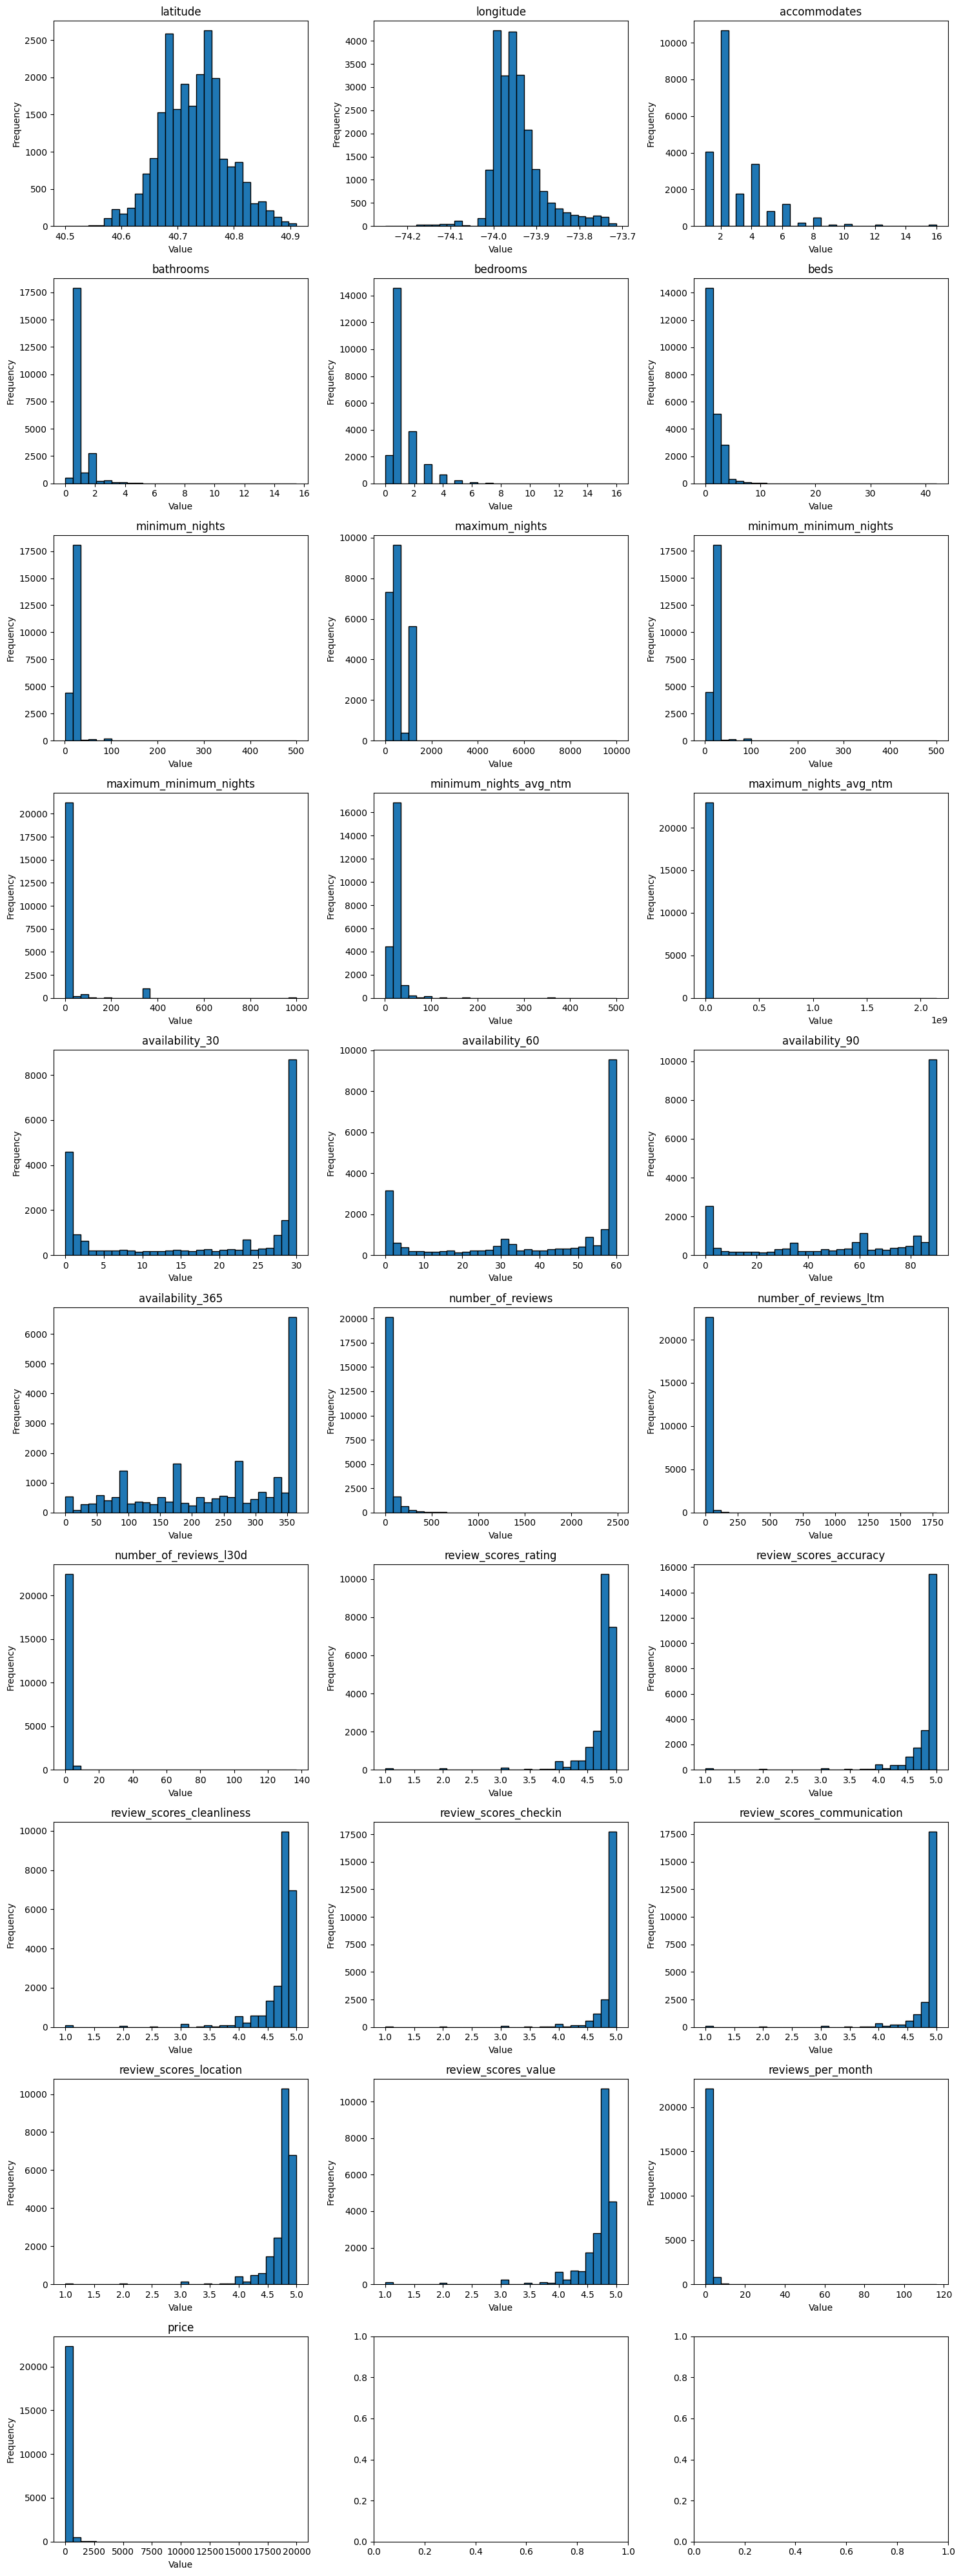

In [65]:
# Set up subplots
num_cols = df_numeric_without_nan.shape[1]

# Creates multiple plots in a single figure and divide columns into groups of 3 per row
fig, axes = plt.subplots(nrows=(num_cols // 3) + 1, ncols=3, figsize=(15, 4 * (num_cols // 3 + 1)))

axes = axes.flatten()  # Flatten axes array to iterate easily

# Plot histograms for each column
for i, col in enumerate(df_numeric_without_nan.columns):
    axes[i].hist(df_numeric_without_nan[col], bins=30, edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Frequency")

plt.tight_layout()

#### Long tails indicates outliers
#### There are various ways to deal with it
##### 1. IQR Method (Removal of outliers)
##### 2. Winsorization (Capping outliers)
##### 3. Transform Outliers (Log / Square Root / Box-Cox)
##### 4. Replace with existing data (Mean / Median)
#### Since our outliers are valid, we do not want to lose any data we can cap outliers at certain percentiles (Winsorization method) i.e. if some values are bottom 20%ile we just replace them all with 20%ile or if some values are top 80%ile we replace them all with 80%ile

In [66]:
def winsorize_all_columns(df, lower=20, upper=80):
    for col in df.select_dtypes(include=[np.number]).columns:  # Loop over numerical columns
        lower_limit = np.percentile(df[col], lower)
        upper_limit = np.percentile(df[col], upper)
        df[col] = np.clip(df[col], lower_limit, upper_limit)  # Apply capping
    return df

df_with_less_outliers = winsorize_all_columns(df_numeric_without_nan)  # Apply Winsorization to all numeric columns

In [67]:
df_with_less_outliers.head()

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,...,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,price
0,40.76203,-73.987479,2,1.0,1.0,1.0,30,1125,30.0,30.0,...,0,4.86,4.93,4.83,4.98,5.00,4.96,4.86,0.25,139.0
1,40.74523,-73.923180,2,1.0,1.0,1.0,30,150,30.0,30.0,...,0,4.93,4.89,4.89,4.96,4.96,4.79,4.86,0.23,78.0
3,40.71992,-73.987479,4,1.0,2.0,2.0,30,240,30.0,30.0,...,0,4.80,4.75,4.69,4.85,4.87,4.67,4.62,0.40,250.0
4,40.67992,-73.987479,2,1.0,1.0,1.0,30,90,30.0,30.0,...,0,4.70,4.78,4.81,4.84,4.84,4.67,4.64,1.26,185.0
5,40.74490,-73.984990,2,1.0,1.0,1.0,30,365,30.0,30.0,...,0,4.97,4.98,4.95,4.84,5.00,4.96,4.86,0.23,165.0


In [68]:
print("Skewness after winzorizing:")
print("Column Name\t\t\tSkewness")
skewness_after_winsorizing = df_with_less_outliers.skew()
skewness_after_winsorizing

Skewness after winzorizing:
Column Name			Skewness


latitude                      -0.065420
longitude                      0.146377
accommodates                   0.764045
bathrooms                      0.000000
bedrooms                       1.017554
beds                           0.516503
minimum_nights                 0.000000
maximum_nights                 0.840471
minimum_minimum_nights         0.000000
maximum_minimum_nights         0.000000
minimum_nights_avg_ntm         0.000000
maximum_nights_avg_ntm         0.412418
availability_30               -0.477245
availability_60               -0.615975
availability_90               -0.565188
availability_365              -0.245757
number_of_reviews              0.772625
number_of_reviews_ltm          0.847257
number_of_reviews_l30d         0.000000
review_scores_rating          -0.202654
review_scores_accuracy        -0.237360
review_scores_cleanliness     -0.252488
review_scores_checkin         -0.412427
review_scores_communication   -0.446428
review_scores_location        -0.061411


### Step-5: Prediction Time

#### We will split our data for testing, here we have used 20% of data of testing

In [69]:
X = df_with_less_outliers.drop(columns=["price"])
y = df_with_less_outliers["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [71]:
# MAPE Function
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [72]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

metrics = [
    ["Mean Absolute Error (MAE)", mae],
    ["Mean Squared Error (MSE)", mse],
    ["Root Mean Squared Error (RMSE)", rmse],
    ["R² Score", r2],
    ["Mean Absolute Percentage Error (MAPE)", mape]
]

print(tabulate(metrics, headers=["Metric", "Value"], tablefmt="grid"))

+---------------------------------------+------------+
| Metric                                |      Value |
+=======================================+============+
| Mean Absolute Error (MAE)             |   44.6532  |
+---------------------------------------+------------+
| Mean Squared Error (MSE)              | 2990.78    |
+---------------------------------------+------------+
| Root Mean Squared Error (RMSE)        |   54.688   |
+---------------------------------------+------------+
| R² Score                              |    0.35806 |
+---------------------------------------+------------+
| Mean Absolute Percentage Error (MAPE) |   34.655   |
+---------------------------------------+------------+


#### Mean Absolute Error (MAE): Average absolute difference between actual and predicted values. Required for understanding the average magnitude of errors in an interpretable way.
#### Mean Squared Error (MSE): Average squared difference between actual and predicted values (penalizes large errors more). Required to emphasize larger errors, which helps in cases where big mistakes are critical.
#### Root Mean Squared Error (RMSE): Square root of MSE, giving error in the same unit as the target variable. Required for better interpretability of MSE while still penalizing large errors.
#### R² Score: Measures how well the model explains variance in the data (closer to 1 is better). Required to evaluate the overall goodness of fit; tells if the model is capturing useful patterns.
#### Mean Absolute Percentage Error (MAPE): Average percentage difference between actual and predicted values (lower is better). Required for understanding model performance in relative terms, useful for comparing different datasets.